In [1]:

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [2]:
df = pd.read_csv('movies.csv')

In [58]:
# Now let's take a look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,3655,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149
7480,4401,4,2,2019,1130,6.9,222000,1014,1364,458,47,260000000,1670727580,1429,118
6653,2125,5,0,2015,1307,7.0,593000,337,2530,294,47,150000000,1670516444,1403,124
6043,3890,5,0,2012,1905,8.0,1300000,1062,1650,1474,47,220000000,1518815515,987,143


In [5]:
# see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [14]:
# converting columns from float to int

df = df[~df['votes'].isnull()]
df = df[~df['budget'].isnull()]
df = df[~df['gross'].isnull()]
df = df[~df['runtime'].isnull()]


df[['votes']] = df[['votes']].astype(int)
df[['budget']] = df[['budget']].astype(int)
df[['gross']] = df[['gross']].astype(int)
df[['runtime']] = df[['runtime']].astype(int)


In [62]:
df.describe()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
count,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5435.000000,5.435000e+03,5435.000000,5435.000000,5435.000000,5435.000000,5.435000e+03,5.435000e+03,5435.000000,5435.000000
mean,2675.977185,5.202760,3.327139,2001.649678,1292.163937,6.392843,1.149246e+05,1062.818399,1630.792824,930.132107,43.437167,3.593789e+07,1.003874e+08,913.294388,108.156394
std,1542.750869,1.048735,2.627127,10.541826,748.491082,0.963175,1.842397e+05,603.640212,924.537003,535.462356,10.377395,4.155149e+07,1.851237e+08,429.796712,18.121401
min,0.000000,-1.000000,0.000000,1980.000000,0.000000,1.900000,1.950000e+02,0.000000,0.000000,0.000000,-1.000000,6.000000e+03,-2.147484e+09,-1.000000,63.000000
25%,1345.500000,5.000000,0.000000,1993.000000,647.000000,5.800000,1.900000e+04,542.500000,833.500000,468.000000,47.000000,1.000000e+07,1.064342e+07,531.000000,95.000000
50%,2681.000000,5.000000,4.000000,2002.000000,1280.000000,6.500000,5.200000e+04,1062.000000,1608.000000,920.000000,47.000000,2.100000e+07,3.661161e+07,1015.000000,105.000000
75%,4012.500000,6.000000,5.000000,2010.500000,1985.000000,7.100000,1.290000e+05,1601.000000,2435.000000,1401.500000,47.000000,4.500000e+07,1.113831e+08,1355.500000,118.000000
max,5349.000000,9.000000,14.000000,2020.000000,2565.000000,9.300000,2.400000e+06,2068.000000,3213.000000,1851.000000,49.000000,3.560000e+08,2.069522e+09,1480.000000,271.000000


<AxesSubplot:>

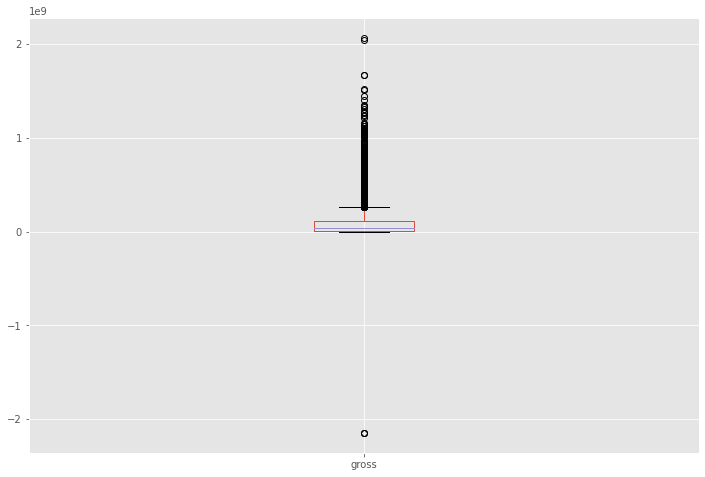

In [16]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [60]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,3655,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149
7480,4401,4,2,2019,1130,6.9,222000,1014,1364,458,47,260000000,1670727580,1429,118
6653,2125,5,0,2015,1307,7.0,593000,337,2530,294,47,150000000,1670516444,1403,124
6043,3890,5,0,2012,1905,8.0,1300000,1062,1650,1474,47,220000000,1518815515,987,143
6646,1545,5,0,2015,166,7.1,370000,811,483,1792,47,190000000,1515341399,1403,137
7494,1534,4,2,2019,2059,6.8,148000,279,1386,1039,47,150000000,1450026933,1428,103
6644,388,5,0,2015,1717,7.3,777000,1062,1650,1474,47,250000000,1402809540,987,141
7247,568,5,0,2018,725,7.3,661000,1721,2694,261,47,200000000,1347597973,987,134
5845,1736,5,1,2011,1096,8.1,790000,454,2870,380,46,125000000,1342321665,1432,130


In [19]:

df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134
3203,Trojan War,PG-13,Comedy,1997,"October 1, 1997 (Brazil)",5.7,5800,George Huang,Andy Burg,Will Friedle,United States,15000000,309,Daybreak,85
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,-2147483648,Twentieth Century Fox,162
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194


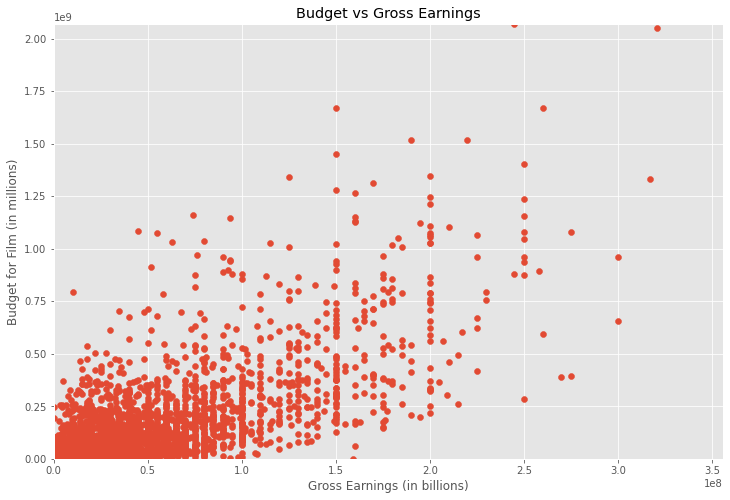

In [78]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings (in billions)')

plt.ylabel('Budget for Film (in millions)')

plt.xlim(0,3.560000e+08)

plt.ylim(0,2.069522e+09)

plt.show()


(0.0, 2069522000.0)

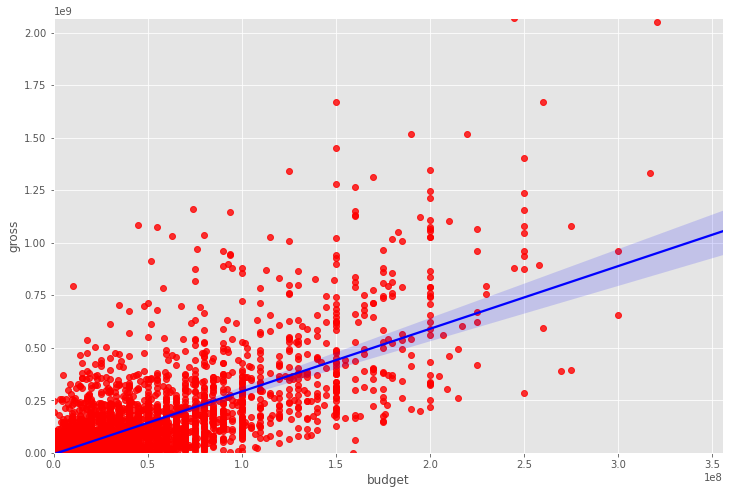

In [70]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.xlim(0,3.560000e+08)

plt.ylim(0,2.069522e+09)

(0.0, 2069522000.0)

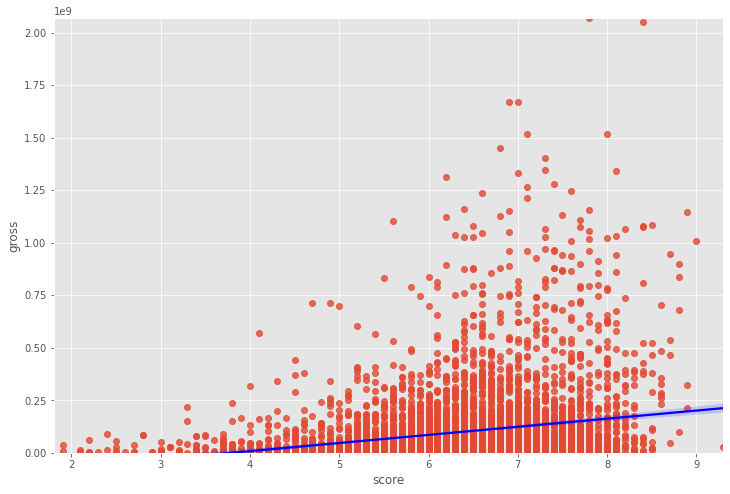

In [75]:
sns.regplot(x="score", y="gross", data=df,line_kws={"color":"blue"})
plt.xlim(1.8,9.300000)

plt.ylim(0,2.069522e+09)


In [76]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,3655,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149
7480,4401,4,2,2019,1130,6.9,222000,1014,1364,458,47,260000000,1670727580,1429,118
6653,2125,5,0,2015,1307,7.0,593000,337,2530,294,47,150000000,1670516444,1403,124
6043,3890,5,0,2012,1905,8.0,1300000,1062,1650,1474,47,220000000,1518815515,987,143


In [47]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.055391,0.205852,0.327793,0.267668,0.074203
score,0.055391,1.000000,0.473789,0.071821,0.200681,0.414580
votes,0.205852,0.473789,1.000000,0.440035,0.550837,0.352437
budget,0.327793,0.071821,0.440035,1.000000,0.669435,0.318595
gross,0.267668,0.200681,0.550837,0.669435,1.000000,0.223576
runtime,0.074203,0.414580,0.352437,0.318595,0.223576,1.000000


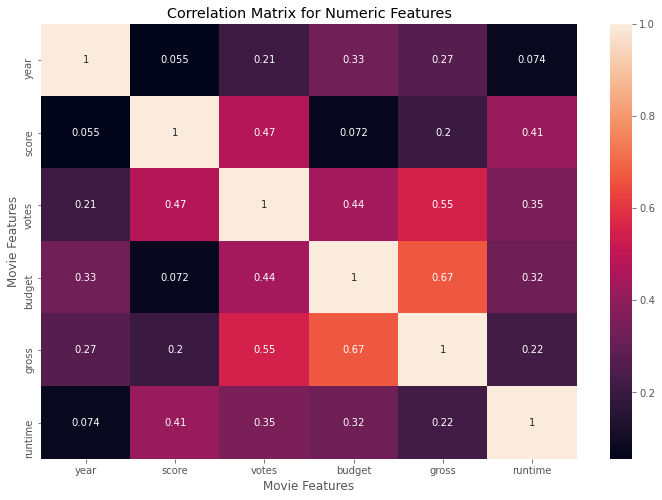

In [50]:
correlation_matrix = df.corr(method='pearson') 

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [61]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'): 
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,3655,5,0,2015,530,7.8,876000,770,1810,357,47,245000000,2069521700,949,138
7244,390,5,0,2018,146,8.4,897000,106,515,1474,47,321000000,2048359754,987,149
7480,4401,4,2,2019,1130,6.9,222000,1014,1364,458,47,260000000,1670727580,1429,118
6653,2125,5,0,2015,1307,7.0,593000,337,2530,294,47,150000000,1670516444,1403,124
6043,3890,5,0,2012,1905,8.0,1300000,1062,1650,1474,47,220000000,1518815515,987,143


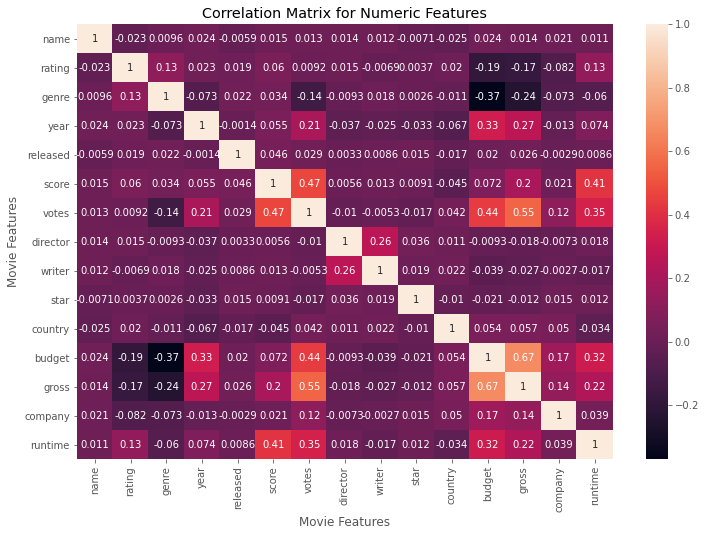

In [52]:
correlation_matrix = df_numerized.corr(method='pearson') 

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [53]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023011,0.009647,0.024418,-0.005889,0.014981,0.012923,0.013698,0.011576,-0.007111,-0.024563,0.023695,0.014397,0.021216,0.010801
rating,-0.023011,1.000000,0.128076,0.022705,0.018821,0.059517,0.009241,0.014848,-0.006881,0.003740,0.020160,-0.186890,-0.167903,-0.082189,0.133239
genre,0.009647,0.128076,1.000000,-0.072815,0.021617,0.033805,-0.136573,-0.009300,0.017790,0.002638,-0.010768,-0.368932,-0.239021,-0.073306,-0.060186
year,0.024418,0.022705,-0.072815,1.000000,-0.001405,0.055391,0.205852,-0.036942,-0.024794,-0.032788,-0.066730,0.327793,0.267668,-0.013061,0.074203
released,-0.005889,0.018821,0.021617,-0.001405,1.000000,0.046343,0.028998,0.003342,0.008619,0.015370,-0.017204,0.019896,0.025702,-0.002928,0.008619
score,0.014981,0.059517,0.033805,0.055391,0.046343,1.000000,0.473789,0.005577,0.013130,0.009139,-0.044624,0.071821,0.200681,0.021055,0.414580
votes,0.012923,0.009241,-0.136573,0.205852,0.028998,0.473789,1.000000,-0.010196,-0.005301,-0.017134,0.042173,0.440035,0.550837,0.119367,0.352437
director,0.013698,0.014848,-0.009300,-0.036942,0.003342,0.005577,-0.010196,1.000000,0.262973,0.036289,0.011107,-0.009341,-0.017646,-0.007337,0.018082
writer,0.011576,-0.006881,0.017790,-0.024794,0.008619,0.013130,-0.005301,0.262973,1.000000,0.019255,0.022076,-0.039448,-0.026699,-0.002652,-0.016671
star,-0.007111,0.003740,0.002638,-0.032788,0.015370,0.009139,-0.017134,0.036289,0.019255,1.000000,-0.010140,-0.021283,-0.011811,0.015087,0.012439


In [54]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.023011
          genre       0.009647
          year        0.024418
          released   -0.005889
          score       0.014981
          votes       0.012923
          director    0.013698
          writer      0.011576
          star       -0.007111
          country    -0.024563
          budget      0.023695
          gross       0.014397
          company     0.021216
          runtime     0.010801
rating    name       -0.023011
          rating      1.000000
          genre       0.128076
          year        0.022705
          released    0.018821
          score       0.059517
          votes       0.009241
          director    0.014848
          writer     -0.006881
          star        0.003740
          country     0.020160
          budget     -0.186890
          gross      -0.167903
          company    -0.082189
          runtime     0.133239
genre     name        0.009647
          rating      0.128076
        

In [55]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget    genre      -0.368932
genre     budget     -0.368932
gross     genre      -0.239021
genre     gross      -0.239021
rating    budget     -0.186890
budget    rating     -0.186890
rating    gross      -0.167903
gross     rating     -0.167903
genre     votes      -0.136573
votes     genre      -0.136573
rating    company    -0.082189
company   rating     -0.082189
genre     company    -0.073306
company   genre      -0.073306
genre     year       -0.072815
year      genre      -0.072815
country   year       -0.066730
year      country    -0.066730
genre     runtime    -0.060186
runtime   genre      -0.060186
country   score      -0.044624
score     country    -0.044624
writer    budget     -0.039448
budget    writer     -0.039448
year      director   -0.036942
director  year       -0.036942
country   runtime    -0.033554
runtime   country    -0.033554
year      star       -0.032788
star      year       -0.032788
writer    gross      -0.026699
gross     writer     -0.026699
year    

In [56]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.550837
gross     votes       0.550837
budget    gross       0.669435
gross     budget      0.669435
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [57]:
# votes and budget have the high correlation to gross earning